In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from zipfile import ZipFile

In [57]:
!pip install kaggle

In [58]:
kaggle_credentials=json.load(open('/content/kaggle (1).json'))

In [59]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [60]:
#!/bin/bash
!kaggle datasets download imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
with ZipFile ('customer-personality-analysis.zip','r') as zip_ref:
  zip_ref.extractall()

**Data Cleaning**

In [62]:
df=pd.read_csv('/content/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [63]:
df.shape

(2240, 29)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [65]:
df['Z_CostContact'].value_counts()

,count
Z_CostContact,
3,2240


In [66]:
df['Z_Revenue'].value_counts()

,count
Z_Revenue,
11,2240


In [67]:
#checking for null values
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [68]:
#dropping null values
df.dropna(inplace=True)

In [69]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [70]:
#converting dt_customer to datetime format
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

In [71]:
#finding number of years customer has been shopping
df['Years_Shopping']=2025-df['Dt_Customer'].dt.year

In [72]:
#feature enginnering
#finding age of customer through Year_Birth
df['Age']=2025-df['Year_Birth']


In [73]:
#finding total money spent by customer
df['Spent']=df['MntFishProducts']+df['MntGoldProds']+df['MntFruits']+df['MntWines']+df['MntMeatProducts']+df['MntSweetProducts']


In [74]:
#finding number of children
df['Children']=df['Kidhome']+df['Teenhome']

In [75]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [76]:
#creating new labels for marital status
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [77]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Partner,1430
Alone,786


In [78]:
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [79]:
#simplitfying education feature
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [80]:
df['Education'].value_counts()

,count
Education,
Graduate,1116
Postgraduate,846
Undergraduate,254


In [81]:
#creating copy of dataset for visualising
data_for_visualization=df.copy()

In [82]:
data_for_visualization=data_for_visualization[data_for_visualization['Age']<90]

In [83]:
#dropping unecessary columns
drop_col = ["Z_CostContact", "Z_Revenue", "Year_Birth", "ID","Dt_Customer"]
df = df.drop(drop_col, axis=1)

In [84]:
#maximum age is
df['Age'].max()

132

In [85]:
#dropping data with age>90
df=df[df['Age']<90]

In [86]:
df['Age'].max()

85

**Data Preprocessing**

In [87]:
#Label encoding categorical features
from sklearn.preprocessing import LabelEncoder
le_e=LabelEncoder()
le_ms=LabelEncoder()
df['Education']=le_e.fit_transform(df['Education'])
df['Marital_Status']=le_ms.fit_transform(df['Marital_Status'])

In [88]:
from sklearn.preprocessing import StandardScaler
#create dataset with only information about customer
ds = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )


In [89]:
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Shopping,Age,Spent,Children
0,0,0,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,13,68,1617,0
1,0,0,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,11,71,27,2
2,0,1,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,12,60,776,0
3,0,1,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,11,41,53,1
4,1,1,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,11,44,422,1


In [90]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_ds)

In [91]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_ds)
    inertia.append(kmeans.inertia_)

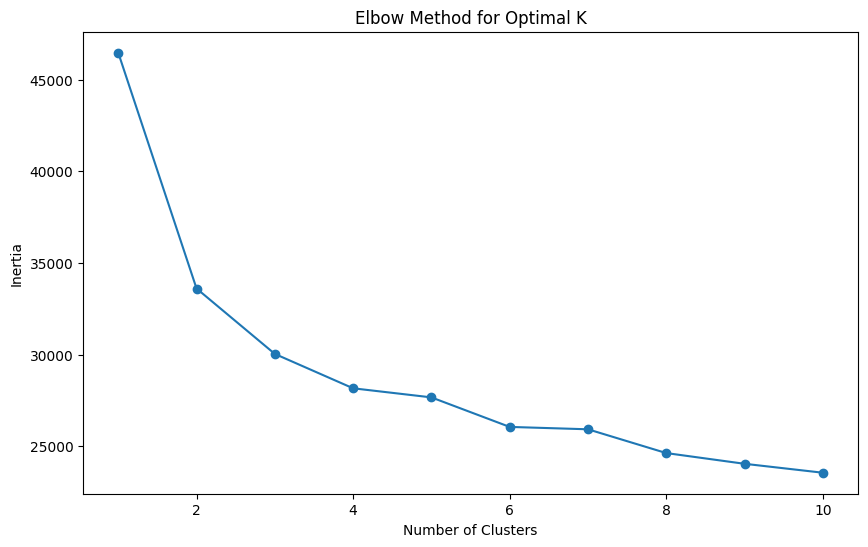

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [93]:
#Number of clusters=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_ds)


In [95]:
scaled_ds['Cluster'] = clusters

In [96]:
data_for_visualization['Cluster'] = clusters

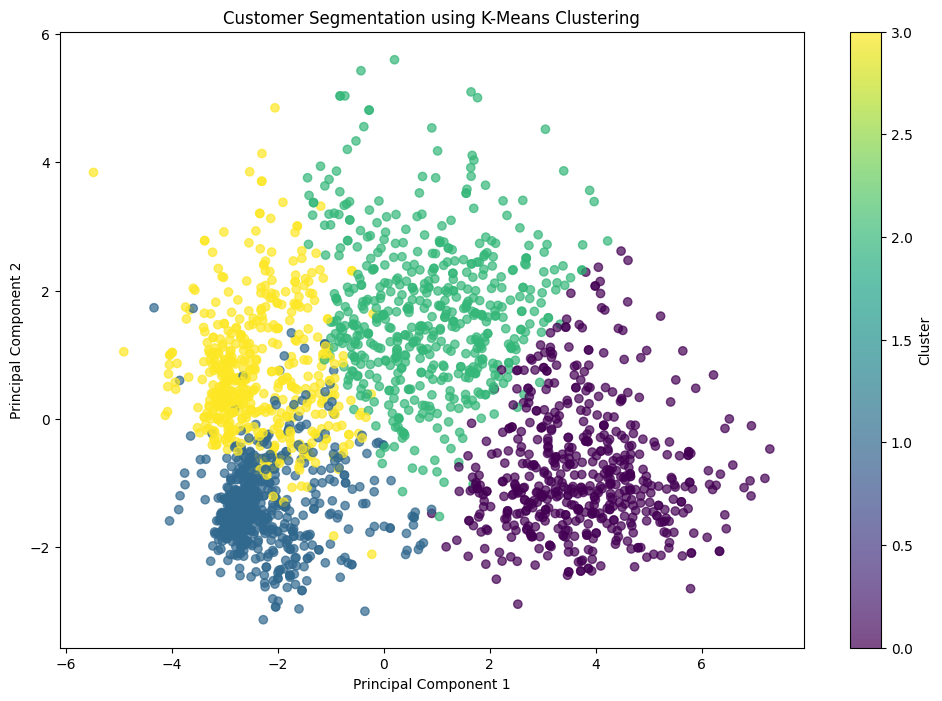

In [97]:


plt.figure(figsize=(12,8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                      c=clusters, cmap='viridis', alpha=0.7)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

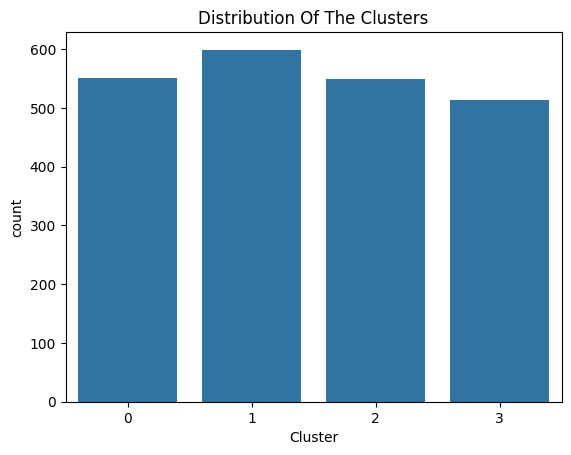

In [98]:
pl = sns.countplot(x=scaled_ds["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [99]:
#analysis of 4 clusters
cluster_analysis = data_for_visualization.groupby('Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Spent': 'mean'
}).round(1)

print("\nCluster Characteristics:")
print(cluster_analysis)


Cluster Characteristics:
          Age   Income   Spent
Cluster                       
0        56.4  77339.5  1384.6
1        48.1  30192.7   106.8
2        60.2  59771.9   820.1
3        60.6  42967.5   128.8


In [100]:
data_for_visualization.to_csv("final_data_with_clusters.csv", index=False)
